## 낮은 분산의 피쳐 제거

In [9]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

data = pd.read_csv('mobile_train.csv')
print(data.shape)
print()

var_thresh = VarianceThreshold(threshold = 0.2)
transformed_data = var_thresh.fit_transform(data)
transformed_data.shape
# 변환된 데이터에는 분산이 0.2 미만의 열들은 제거 되었다.

(2000, 21)



(2000, 19)

## 피어슨 상관관계

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

# 회귀용 데이터를 불러온다.
data = fetch_california_housing()
X = data['data']
col_names = data['feature_names']
y = data['target']

# pandas 데이터프레임으로 변환한다.
df = pd.DataFrame(X, columns = col_names)

# 높은 상관 관계를 가지는 열을 추가한다.
df.loc[:, 'MedInc_Sqrt'] = df.MedInc.apply(np.sqrt)

# 피어슨 상관관계 행렬을 출력한다.
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


## 단일 변량 피쳐 선택 방법

In [19]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

class UnivariateFeatureSelction:
    def __init__(self, n_features, problem_type, scoring):
        """
        scikit-learn 의 다양한 단일변량 피쳐 선택 함수를 위한
        단일변량 피쳐 선택 래퍼 함수
        :param n_features: 실수는 SelectPercentile, 아니면 SelectKBest
        :param problem_type: 문제의 타입: 분류 혹은 회귀
        :param scoring: 평가 함수의 이름
        """
 
        # 주어진 문제에 따라 사용 가능한 평가 함수를 정의한다.
        # 원하면 새로운 평가 함수를 추가할 수 있다.
        if problem_type == "classification":
            valid_scoring = {
            "f_classif": f_classif,
            "chi2": chi2,
            "mutual_info_classif": mutual_info_classif
             }
        else:
            valid_scoring = {
            "f_regression": f_regression,
            "mutual_info_regression": mutual_info_regression
            }
        
        # 입력으로 주어진 평가 함수가 사용 가능한 평가 함수가 아닌 경우
        # 오류를 발생한다.
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")

        # n_features 가 정수인 경우 selectkbest 를 사용한다.
        # n_features 가 실수인 경우 selectpercentile 를 사용한다.
        # 두 함수 모두 원래는 정수를 입력으로 받음을 유의하라.
        if isinstance(n_features, int):
            self.selection = SelectKBest(
                valid_scoring[scoring],
                k=n_features
            )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features * 100)
            )
        else:
            raise Exception("Invalid type of feature")


    # 동일한 학습 함수를 사용한다.
    def fit(self, X, y):
        return self.selection.fit(X, y)

    # 동일한 변환 함수를 사용한다.
    def transform(self, X):
        return self.selection.transform(X)

    # 동일한 학습+변환 함수를 사용한다.
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)

In [23]:
ufs = UnivariateFeatureSelction(
    n_features=0.5,
    problem_type="regression",
    scoring="f_regression"
)

ufs.fit(X, y)
X_transformed = ufs.transform(X)
X_transformed

array([[ 8.3252    , 41.        ,  6.98412698, 37.88      ],
       [ 8.3014    , 21.        ,  6.23813708, 37.86      ],
       [ 7.2574    , 52.        ,  8.28813559, 37.85      ],
       ...,
       [ 1.7       , 17.        ,  5.20554273, 39.43      ],
       [ 1.8672    , 18.        ,  5.32951289, 39.43      ],
       [ 2.3886    , 16.        ,  5.25471698, 39.37      ]])

## 탐욕적 피쳐 선택

In [46]:
# greedy.py
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import make_classification

class GreedyFeatureSelection:
    """
    탐욕적 피쳐 선택을 위한 커스텀 클래스
    사용하는 데이터에 맞게 변경해야 한다.
    """
    def evaluate_score(self, X, y):
        """
        모델을 데이터로 검증하고 AUC 값을 반환하는 함수
        NOTE: 학습과 검증에 동일한 데이터를 사용한다.
        즉, 오버피팅이 일어난다.
        이는 실제 탐욕적 피쳐 선택의 문제점 중 하나이다.
        k-폴드를 사용하면 k 배 더 오래 걸린다.
        제대로 구현하려면 폴드외 AUC 를 계산하여 
        모든 폴드에 대한평균 AUC 값을 반환해야 한다.
        앞서 사용한 코드를 사용하여 이 코드를 약간만 수정하면 가능하다.
        :param X: 학습 데이터
        :param y: 타겟 변수
        :return: 오버피팅된 AUC 값
        """
        # 로지스틱 회귀 모델을 학습하고 AUC 를 같은 데이터로 계산한다.
        # and calculate AUC on same data
        # 다른 모델을 사용할 수도 있다.
        model = linear_model.LogisticRegression()
        model.fit(X, y)
        predictions = model.predict_proba(X)[:, 1]
        auc = metrics.roc_auc_score(y, predictions)
        return auc

    def _feature_selection(self, X, y):
        """
        탐욕적 피쳐 선택 함수
        :param X: 데이터, numpy array
        :param y: 타겟 변수, numpy array
        :return: (최고 점수, 최고 피쳐)
        """
    
        # 선택된 피쳐 목록과 최고 점수 목록을 초기화 한다.
        good_features = []
        best_scores = []

        # 피쳐 개수를 변수로 저장한다.
        num_features = X.shape[1]

        # 무한 루프
        while True:
    
            # 이 루프에서 최고 점수와 피쳐를 초기화 한다.
            this_feature = None
            best_score = 0
        
            # 모든 피쳐에 대해 계산한다.
            for feature in range(num_features):
                # if feature is already in good features,
                # 이미 피쳐가 선택된 피쳐 목록에 존재한다면 건너 뛴다.
                if feature in good_features:
                    continue
                
                # 지금까지 선택된 피쳐에 현재 피쳐를 추가하여 학습에 사용할
                # 피쳐 목록을 만든다.
                selected_features = good_features + [feature]
                xtrain = X[:, selected_features]
                
                # 점수를 계산한다. 여기서는 AUC 를 사용한다.
                score = self.evaluate_score(xtrain, y)
            
                # 점수가 이전 최고 점수보다 높다면 최고 점수를 갱신하고
                # 피쳐를 선택한다.
                if score > best_score:
                    this_feature = feature
                    best_score = score
        
            # 선택된 피쳐가 있다면 선택된 피쳐 목록에 추가하고
            # 최고 점수를 최고 점수 목록에 추가한다.
            if this_feature != None:
                good_features.append(this_feature)
                best_scores.append(best_score)
        
            # 이전 루프에서 점수가 개선되지 않았다면 무제한 루프를 마친다.
            if len(best_scores) > 2:
                if best_scores[-1] < best_scores[-2]:
                    break
            
        # 최고 점수와 선택된 피쳐의 목록을 반환한다.
        return best_scores[:-1], good_features[:-1]


    def __call__(self, X, y):
        """
        클래스 객체를 입력 변수와 함께 호출하면 이 함수가 실행된다.
        """
        # 피쳐를 선택하고 점수와 선택된 피쳐를 저장한다.
        scores, features = self._feature_selection(X, y)
        # 데이터를 선택된 피쳐만 포함하도록 변환한다.
        return X[:, features], scores
    
if __name__ == "__main__":
    # 이진분류 학습 데이터 생성
    X, y = make_classification(n_samples=1000, n_features=100)
    # 탐욕적 피쳐 선택 수행
    X_transformed, scores = GreedyFeatureSelection()(X, y)

## RFE (recursive feature elimination)

In [26]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# 회귀 학습용 데이터를 불러온다.
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# 선형회귀 모델을 초기화 한다.
model = LinearRegression()

# RFE 클래스 객체를 초기화 한다.
rfe = RFE(
 estimator=model,
 n_features_to_select=3
)

# RFE 를 학습한다.
rfe.fit(X, y)

# 선택된 피쳐로 데이터를 변환한다.
X_transformed = rfe.transform(X)
X_transformed

array([[   8.3252,   37.88  , -122.23  ],
       [   8.3014,   37.86  , -122.22  ],
       [   7.2574,   37.85  , -122.24  ],
       ...,
       [   1.7   ,   39.43  , -121.22  ],
       [   1.8672,   39.43  , -121.32  ],
       [   2.3886,   39.37  , -121.24  ]])

## feature importance 얻기

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# 회귀 학습용 데이터를 불러온다.
# 당뇨 데이터에서는 주어진 피쳐로 1 년 후 당뇨의 진행 경과를 예측한다.
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# 랜덤포레스트 모델을 초기화 한다.
model = RandomForestRegressor(n_estimators = 500)

# 모델을 학습한다.
model.fit(X, y)

RandomForestRegressor(n_estimators=500)

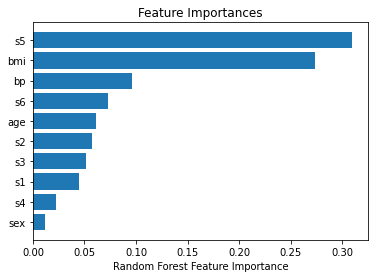

In [37]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

## 주어진 모델을 선택하여 피쳐 선택

In [41]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# 회귀 학습용 데이터를 불러온다.
# 당뇨 데이터에서는 주어진 피쳐로 1 년 후 당뇨의 진행 경과를 예측한다.
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# 랜덤포레스트 모델을 초기화 한다.
model = RandomForestRegressor()

# 모델을 사용해 피쳐를 선택한다.
sfm = SelectFromModel(estimator=model,
                     threshold = 0.1) # 임계값 설정 (최대 피쳐 개수도 설정 가능)
X_transformed = sfm.fit_transform(X, y)

# 선택된 피쳐를 확인한다.
support = sfm.get_support()

# 피쳐 이름을 불러온다.
print([
 x for x, y in zip(col_names, support) if y == True
])

['bmi', 'bp', 's5']
